For the last day all that is learned will be put together to complete a small project.  

Simulate the random walk of a polymer that is restricted to the 2D plane. The segment length of eachstep in the walk is $1$, and the direction for each step is randomly chosen from $\theta$ equals $0$ to $360^o$.  

This is an important project. The concepts here are the basis for theories in diffusion, polymers (every protein that exists), Markov Chains, population genetics, etc. This project will focus more on the physical ideas associated with a random walk.

Simulate a polymer with $N= 100$ segments. Start at each simulation at the origin. For each simulation, pick a seed at the beginning, then write each coordinate to a .csv file in tidy format. Plot $5$ of these simulation on a graph. 

Repeat the simulation and calculate the end-to-end distance, $r$, for each simulation. Plot the histogram of $r^{2}$. Plot the theoretical 2D distribution over your results. Try to carry out enough simulations to get a decent looking histogram, but if the simulations are slow, a rough distribution is fine.  



A) Vary the number of steps on the random walk. Using a large number of simulations (say 1000 per set number of steps), find the relationship between number of steps, $N = 100, 200, ... 1000$ and the $r^{2}$ of end-to-end distance.

B) Now assume that $\theta$ is restricted to $\pm \phi$, where $\phi$ varies from $360, 340,...$ to $20, 0$ degrees, compute the distribution of $r^{2}$ for each of these values. Then find the mean of each $r^{2}$ distribution with a different value of $\phi$. Plot the relationship of $\phi$ and $r^{2}$. 

C) It is a bit harder to visualize, but what if we look into the 3rd dimension? Modify the function to deal with a 3-space coordinate system and calculate the same values of coordinates, x, y, and z displacement, and the net displacement. Plot the same plot from A) with values obtained with this 3D model.

In [69]:
# First import packages
import numpy as np
import scipy
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd

In [67]:
# First initiate a blank array to store the data in
randwalk_coords = np.zeros((100, 2))

# Now iterate over each coordinate step (ignoring the first step)
for i in range(99):
    # Get the new angle
    new_ang = np.random.randint(360) 
    # Convert angle to radians
    new_ang_rad = new_ang / 180 * np.pi
    
    # Get the new position using the coordinates displacement
    increment_x = np.cos(new_ang_rad) + randwalk_coords[i, 0]
    increment_y = np.sin(new_ang_rad) + randwalk_coords[i, 1]
    
    # Assign the new values to the next position
    randwalk_coords[i+1] = [increment_x, increment_y]
#print(future_coords)    

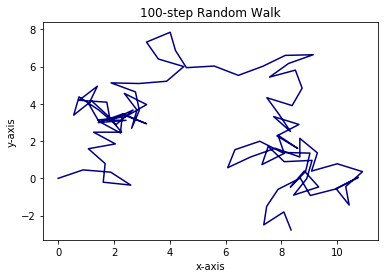

In [68]:
# Lets look at the new data just created
_ = plt.plot(randwalk_coords[:,0], randwalk_coords[:, 1], color='navy')
_ = plt.xlabel('x-axis')
_ = plt.ylabel('y-axis')
_ = plt.title('100-step Random Walk')

In [30]:
# Now lets find the net displacement

# Calculate the net displacement in both Cartesian coordinates
first_final_x = [randwalk_coords[0, 0], randwalk_coords[-1, 0]]
first_final_y = [randwalk_coords[0, 1], randwalk_coords[-1, 1]]
net_x = first_final_x[1] - first_final_x[0]
net_y = first_final_y[1] - first_final_y[0]
print(f'Net displacement in x: {net_x}')
print(f'Net displacement in y: {net_y}')

# Calculate the total displacement
net_dist = np.sqrt(net_x ** 2 + net_y ** 2)
print(f'Net displacement: {net_dist}')

Net displacement in x: 4.348070524259346
Net displacement in y: 2.2724403688389523
Net displacement: 4.90608831085029


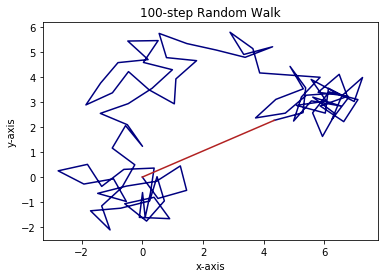

In [32]:
# Lets look at the new data just created
_ = plt.plot(randwalk_coords[:,0], randwalk_coords[:, 1], color='navy')
_ = plt.plot(first_final_x, first_final_y, color='firebrick')
_ = plt.xlabel('x-axis')
_ = plt.ylabel('y-axis')
_ = plt.title('100-step Random Walk')

If we wanted to make sure our work was reproducible we would not want to run each cell over and over again because that would remove the previous work we had done. As a rule we don't want to change what has alread been written. Like any other notebook, we never want to erase what we previously wrote. You never know when it may include valuable information.  

As well, we don't want to copy paste cells. It takes up space on the notebook and makes it harder to see what you are doing. The same way you would not describe an experiment in a notebook for each data entry, it is best to define the work you are doing in a function once and refer to it later.  

This is where jupyter notebooks really shine. You can work on parts of a function then once they work a function can be used to reuse what you already wrote!

In [86]:
# Define the random walk generator

def randwalk(N=100, rand_seed=42, plot_traj=False):
    """
    For each set of coordinates in a 2xN trajectory, compute the next
    set of coordinates using a random number generator.
    
    param N: number of steps in the random walk
    param rand_seed: seed for random number generator
    
    """
    
    # Seed random number generator
    np.random.seed(rand_seed)
    randwalk_coords = np.zeros((N, 2))
    # Now iterate over each coordinate step (ignoring the first step)
    for i in range(N-1):
        # Get the new angle
        new_ang = np.random.randint(360) 
        # Convert angle to radians
        new_ang_rad = new_ang / 180 * np.pi

        # Get the new position using the coordinates displacement
        increment_x = np.cos(new_ang_rad) + randwalk_coords[i, 0]
        increment_y = np.sin(new_ang_rad) + randwalk_coords[i, 1]

        # Assign the new values to the next position
        randwalk_coords[i+1] = [increment_x, increment_y]
    
    # Calculate the net displacement in both Cartesian coordinates
    first_final_x = [randwalk_coords[0, 0], randwalk_coords[-1, 0]]
    first_final_y = [randwalk_coords[0, 1], randwalk_coords[-1, 1]]
    
    net_x = first_final_x[1] - first_final_x[0]
    net_y = first_final_y[1] - first_final_y[0]
    
    # Calculate the total displacement
    net_dist = np.sqrt(net_x ** 2 + net_y ** 2)
    
    # Plot the random walk
    if plot_traj:
        _ = plt.plot(randwalk_coords[:,0], randwalk_coords[:, 1], color='navy')
        _ = plt.plot(first_final_x, first_final_y, color='firebrick')
        _ = plt.xlabel('x-axis')
        _ = plt.ylabel('y-axis')
        _ = plt.title('100-step Random Walk')
        
    return randwalk_coords, net_x, net_y, net_dist

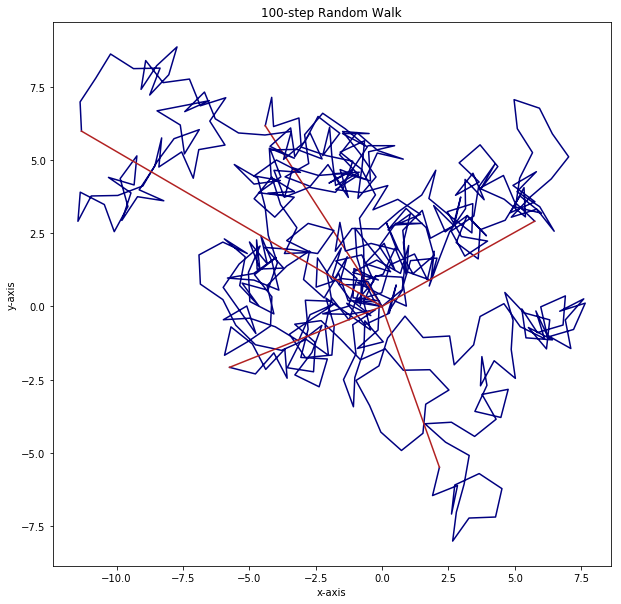

In [87]:
# Make a graph big enough to see each trajectory
plt.figure(figsize=(10, 10))

# Store the net displacements
num_sims = 5
displaces = np.zeros(num_sims)
for i in range(num_sims):
    randwalk_result = randwalk(N=100, rand_seed=i, plot_traj=True)
    displaces[i] = randwalk_result[3]

In [88]:
# Lets find all the different displacements
displaces

array([ 7.58249209,  5.91108216,  6.44800649,  6.10855978, 12.80822464])

In [89]:
# Now lets write all of these simulations
sim_data = randwalk(N=100, rand_seed=42, plot_traj=False)
temp_pd = pd.DataFrame(sim_data[0], 
                      columns=['x position', 'y position'])
temp_pd.to_csv('test_random_walk_data.csv', sep=',')

In [90]:
# Let us read back that same data!
sim_df = pd.read_csv('test_random_walk_data.csv')
sim_df.head()

,Unnamed: 0,x position,y position
0,0,0.000000,0.000000
1,1,-0.207912,0.978148
2,2,0.770236,0.770236
3,3,0.770236,-0.229764
4,4,0.494599,0.731498


Great! We now have a reproducible way to simulate a random walk, write it to a dataframe and to a csv. Last lets briefly analyze the data.  

Lets look at the root mean squared displacement (RMSD), opposed to the mean displacement (which we can see already would be 0). Where this comes from may already been taught to you or will be taught if you take CHEM 241 in the winter quarter.

In [91]:
# We will need a lot of simulations to get any meaningful distribution
rmsd_values = np.zeros(100)
for i in range(100):
    sim_data = randwalk(N=100, rand_seed=i, plot_traj=False)
    rmsd_values[i] = sim_data[3]

/Users/adam/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


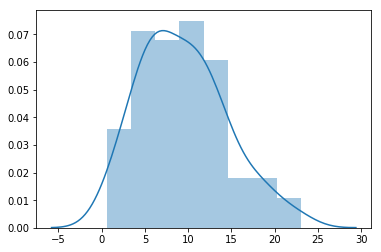

In [92]:
# A quick way to plot distributions of values is to use seaborn
temp = sns.distplot(rmsd_values)

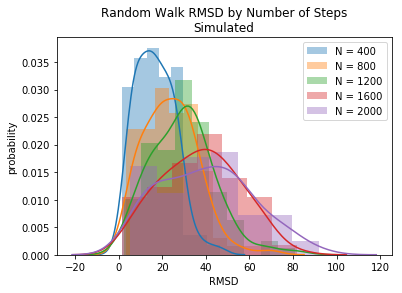

In [108]:
for k in range(5):
    k += 1
    k *= 4
    rmsd_values = np.zeros(100)
    for j in range(100):
        temp_steps = 100 * k
        sim_data = randwalk(N=temp_steps, rand_seed=j, plot_traj=False)
        rmsd_values[j] = sim_data[3]
    temp = sns.distplot(rmsd_values, label=f'N = {100 * k}')
_ = plt.xlabel('RMSD')
_ = plt.ylabel('probability')
_ = plt.title('Random Walk RMSD by Number of Steps\nSimulated')
_ = plt.legend()

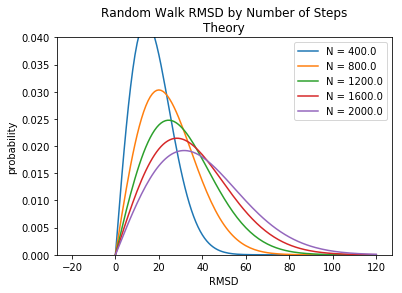

In [107]:
for k in np.linspace(4, 20, 5):
    x = np.linspace(-20, 120, 141)
    _ = plt.plot(x, (2 * x) / (100 * k) * np.exp(-x ** 2 / (100 * k)), label=f'N = {k * 100}')
_ = plt.xlabel('RMSD')
_ = plt.ylabel('probability')
_ = plt.title('Random Walk RMSD by Number of Steps\nTheory')
_ = plt.legend()
_ = plt.ylim(0, .04)

The equation used here, $\frac{r^{2}}{N} e^{\tfrac{-x^{2}}{N}}$, is known as the Rayleigh distribution and has its roots in the binomial distribution (see chapter 18 of Ken Dill's _Molecular Driving Forces_ for a good derivation). The theory looks close to the simulated data, but lets make sure there is a good fit. 